In [ ]:
def strcat_list(L):
    assert type(L) is list
    return ''.join(reversed(L))
    
# strcat_list(['abc', 'def', 'ghi']) == 'ghidefabc'

In [ ]:
def ceiling_fraction(a, b):
    mul = a / b
    result = int(mul)
    if result == mul:
        return result
    elif (mul > result):
        return (result + 1)
# ceiling_fraction(0.3, 0.1) == ceiling(2.9999999999999996) == 3

In [ ]:
def count_word_lengths(s):
    assert all([x.isalpha() or x == ' ' for x in s])
    assert type(s) is str

    list = []
    ## if list not empty or only has spaces
    if not s or s.isspace():
        return list
    ## split words by space count length of work append to new list
    else:
        words = s.split(' ')
        for i in words:
            list.append(len(i))
        return list

# count_word_lengths('zlvtqtvpjwohkvzsxxno bzp cabtcnibffyh lj') == [20, 3, 12, 2]

In [ ]:
def compress_vector(x):
    assert type(x) is list
    d = {'inds': [], 'vals': []}

    for index, i in enumerate(x):
        if i != 0.0:
            d['inds'].append(index)
            d['vals'].append(i)
    return d

def decompress_vector(d, n=None):
    # Checks the input
    assert type(d) is dict and 'inds' in d and 'vals' in d, "Not a dictionary or missing keys"
    assert type(d['inds']) is list and type(d['vals']) is list, "Not a list"
    assert len(d['inds']) == len(d['vals']), "Length mismatch"
    
    ## Determine length of the full vector
    i_max = max(d['inds']) if d['inds'] else -1
    if n is None:
        n = i_max+1
    else:
        assert n > i_max, "Bad value for full vector length"
    
    result = [0]*n
    for i, v in zip(d['inds'], d['vals']):
        result[i] += v
    return result

In [ ]:
def find_common_inds(d1, d2):
    assert type(d1) is dict and 'inds' in d1 and 'vals' in d1
    assert type(d2) is dict and 'inds' in d2 and 'vals' in d2

    return list(set(d1['inds']).intersection(set(d2['inds'])))

In [ ]:
grades = [
    # First line is descriptive header. Subsequent lines hold data
    ['Student', 'Exam 1', 'Exam 2', 'Exam 3'],
    ['Thorny', '100', '90', '80'],
    ['Mac', '88', '99', '111'],
    ['Farva', '45', '56', '67'],
    ['Rabbit', '59', '61', '67'],
    ['Ursula', '73', '79', '83'],
    ['Foster', '89', '97', '101']
]

grades
import pandas as pd


In [ ]:
# Create a dict mapping names to lists of grades.
def build_grade_lists(grades):
    s = {}
    df = pd.DataFrame(grades[1:],columns=grades[0])
    for index, i in enumerate(df.Student):
        s[i] = list(map(int, df.iloc[index,1:]))
    return s
build_grade_lists(grades)

In [ ]:
def normalize_string(s):
    assert type (s) is str
    return ''.join(ch for ch in s.lower() if ch.isalpha() or ch.isspace())

In [ ]:
from collections import defaultdict
from itertools import combinations # Hint!

def update_pair_counts (pair_counts, itemset):
    """
    Updates a dictionary of pair counts for
    all pairs of items in a given itemset.
    """
    assert type (pair_counts) is defaultdict
    for a, b in combinations(itemset, 2):
        pair_counts[(a,b)] += 1
        pair_counts[(b,a)] += 1

def update_item_counts(item_counts, itemset):
    for i in itemset:
        item_counts[i] += 1

def filter_rules_by_conf (pair_counts, item_counts, threshold):
    rules = {} # (item_a, item_b) -> conf (item_a => item_b)
    for (a,b) in pair_counts:
        assert a in item_counts
        conf_ab = pair_counts[(a,b)] / item_counts[a]
        if conf_ab >= threshold:
            rules[(a,b)] = conf_ab
    return rules

def find_assoc_rules(receipts, threshold):
    ###
    ### YOUR CODE HERE
    ###
    pair_counts = defaultdict(int)
    item_counts = defaultdict(int)
    
    for i in receipts:
        update_pair_counts(pair_counts, i)
        update_item_counts(item_counts, i)
        
    return filter_rules_by_conf(pair_counts, item_counts, threshold)

Representing numbers as strings

In [ ]:
def eval_strint(s, base=2):
    assert type(s) is str
    assert 2 <= base <= 36
    return int(s, base=base)

def is_valid_strfrac(s, base=2):
    return all([is_valid_strdigit(c, base) for c in s if c != '.']) \
        and (len([c for c in s if c == '.']) <= 1)
    
def eval_strfrac(s, base=2):
    assert is_valid_strfrac(s, base), "'{}' contains invalid digits for a base-{} number.".format(s, base)
    
    slist = [i for i in s if i !="."]
    news = "".join(slist)
    try:
        dot_position = len(s) - s.index(".") -1 
    except:
        dot_position = 0
    converted = int(news, base=base) /  (base ** dot_position)
    return converted

In [ ]:
def fp_bin(v):
    assert type(v) is float
    # Get the hex value
    v = v.hex()  # Convert float to its hexadecimal values to extact sign, number and exponent

    v = v.split('0x')  # Split to extract the sign portion

    v_sign = v[0] if v[0] == "-" else "+"

    # split the number and power  parts
    lst_bin_exp = v[1].split('p')
    # get the power part
    v_exp = int(lst_bin_exp[1])
    # get the number parts to format
    try:
        dot_position = lst_bin_exp[0].index(".")
        secondpart = lst_bin_exp[0][dot_position + 1:]
    except:
        dot_position = len(lst_bin_exp[0])
        secondpart = "0"

    firstpart = lst_bin_exp[0][:dot_position]
    secondpart = bin(int(secondpart, 16))[2:].zfill(52)
    v_signif = str(firstpart) + "." + secondpart

    return (v_sign,v_signif,v_exp)

def eval_fp(sign, significand, exponent, base=2):
    assert sign in ['+', '-'], "Sign bit must be '+' or '-', not '{}'.".format(sign)
    assert is_valid_strfrac(significand, base), "Invalid significand for base-{}: '{}'".format(base, significand)
    assert type(exponent) is int
    
    MF = int(base) ** int(exponent)
    number_to_base10 = eval_strfrac(str(significand), int(base)) * MF
    
    return number_to_base10 if sign == "+" else -1*number_to_base10

def add_fp_bin(u, v, signif_bits):
    u_sign, u_signif, u_exp = u
    v_sign, v_signif, v_exp = v
    
    # You may assume normalized inputs at the given precision, `signif_bits`.
    assert u_signif[:2] == '1.' and len(u_signif) == (signif_bits+1)
    assert v_signif[:2] == '1.' and len(v_signif) == (signif_bits+1)
    
    ###
    ### YOUR CODE HERE
    ###
    u_base10 = eval_fp(u_sign, u_signif, u_exp, 2)
    v_base10 = eval_fp(v_sign, v_signif, v_exp, 2)
    
    sums = u_base10 + v_base10
    sums = fp_bin(sums)
    
    
    v_signif = sums[1][:int(signif_bits)+1]

    return((sums[0],v_signif, sums[2]))

Floating-point arithmetic

In [ ]:
def alg_sum(x): # x == x[:n]
    s = 0.
    for x_i in x: # x_0, x_1, \ldots, x_{n-1}
        s += x_i
    return s

def alg_sum_accurate(x):
    assert type(x) is list
    
    old_total, computation_error = 0.0, 0.0
    for item in x:
        #subtract the rounding error from the new item before adding it
        new_item = item - computation_error
        # now get the sum 
        new_total = old_total + new_item
        #calculate the computation error basically when youtake newTotal andsubtract the oldsum and the new items you should get zero 
        # but because of rounding , you will see a residual which is the computationError 
        computation_error = (new_total - old_total) - new_item
        old_total = new_total

    # Note that you subtract the computation error before you return the result 
    return new_total - computation_error

Simple string processing review

In [ ]:
def is_ssn(s):
    bls = s.split('-')
    correct_len = [3,2,4] # check your inputs always!!!!
    return all([ ( b.isdigit() and len(b) == c ) for b, c in zip(bls, correct_len) ])

Regular expressions

**Other Search Methods.** Besides `search()`, there are several other pattern-matching procedures:

1. `match()`    - Determine if the regular expression (RE) matches at the beginning of the string.
2. `search()`   - Scan through a string, looking for any location where this RE matches.
3. `findall()`  - Find all substrings where the RE matches, and returns them as a list.
4. `finditer()` - Find all substrings where the RE matches, and returns them as an iterator.

We'll use several of these below; again, refer to the [HOWTO](https://docs.python.org/3/howto/regex.html) for more details.

In [ ]:
import re
#  Make the expression more readable with a re.VERBOSE pattern
re_names2 = re.compile(r'''^              # Beginning of string
                           ([a-zA-Z]+)    # First name
                           \s+            # At least one space
                           ([a-zA-Z]+\s)? # Optional middle name
                           ([a-zA-Z]+)    # Last name
                           $              # End of string
                        ''',
                        re.VERBOSE)
print(re_names2.match('Rich Vuduc').groups())
print(re_names2.match('Rich S Vuduc').groups())

In [ ]:
def parse_email (s):
    """Parses a string as an email address, returning an (id, domain) pair."""
    try:
        look = re.compile(r'^\D[-+.@\w]+.[a-z]{3}$')
        check = look.match(s)
        email = check.group()
        return (tuple(email.split('@')))
    except:
        raise ValueError

def parse_phone1 (s):
    try:
        look = re.compile(r'\s*?[(\d)]{5}\s*?[\d-]{4}[\d]{4}') #
        check = look.match(s)
        num = check.group().strip()
        area = num.split(')')[0][-3:]
        three, four = num[-8:].split('-')
        return (area, three, four)
    except:
        raise ValueError

def parse_phone2 (s):
    try:
        look = re.compile(r'\s*?[(]?\d{3}[)-]?\s*?\d{3}-?\d{4}\s*?')
        check = look.match(s)
        num = check.group().strip()
        # should be optimized but not sure how?
        if ('(' in num) and not (')' in num) or num[3].isspace(): raise ValueError 
        
        ls = ''.join([x for x in num if x.isdigit()])
        area, three, four = ls[:3], ls[3:6], ls[6:]
        return (area, three, four)
    except:
        raise ValueError

Processing an HTML file

In [ ]:
from bs4 import BeautifulSoup
with open('yelp.htm') as yelp_file:
    soup = BeautifulSoup(yelp_file,'lxml')
rankings = []

ls = soup.find_all('li', class_='regular-search-result')

for search in ls:
    story = search.find('div', class_='media-story')

    rankings.append({
        'name' : story.span.span.text,
        'stars': story.find(class_="i-stars").get('title')[:3],
        'numrevs': int(story.find(class_='review-count rating-qualifier').text.strip().split()[0]),
        'price' : story.find(class_='business-attribute price-range').text
    })

In [ ]:
# 1999 - 99
df['year'] = df['year'].apply(lambda x: "'{:02d}".format(x % 100))

In [ ]:
def tabbles_are_equivalent(A, B):
    """Given two tidy tables ('tibbles'), returns True iff they are
    equivalent.
    """
    return all([all(A[i].isin(B[i].to_list())) for i in A.columns])

In [ ]:
# melt spelled out
def melt(df, col_vals, key, value):
    assert type(df) is pd.DataFrame
#     id = column to keep
    return df.melt(id_vars='country', value_vars=col_vals, var_name=key, value_name=value)

In [ ]:
# string split & join
df[['cases','population']] = df[key].str.split('/',expand=True)
df[cols] = df[cols].astype(str)
df[new_var] = df[cols].agg('/'.join, axis=1)

In [ ]:
# clean text in column
m = re.match(r"^new_?(rel|ep|sn|sp)_(f|m)(\d{2,4})$")
m = re.match("^new_?(rel|ep|sn|sp)_(f|m)(\\d{2,4})$")
if m in None or len(m.groups()) != 3:
    return ['' ,'', '']

Topic 8 Interactive Plots

In [2]:
import seaborn as sns

# The following Jupyter "magic" command forces plots to appear inline
# within the notebook.
%matplotlib inline

/opt/homebrew/Caskroom/miniforge/base/envs/offsite/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

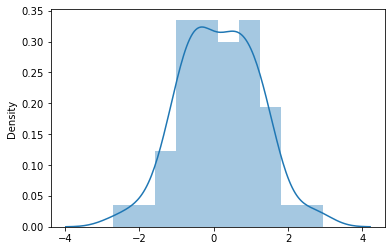

In [3]:
import numpy as np
x = np.random.normal(size=100)
# draw histogram and fir a kernel density estimate
sns.distplot(x)

In [4]:
import pandas as pd
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

**Basic scatter plots.** The most familiar way to visualize a bivariate distribution is a scatterplot, where each observation is shown with point at the x and y values. You can draw a scatterplot with the matplotlib plt.scatter function, and it is also the default kind of plot shown by the jointplot() function:

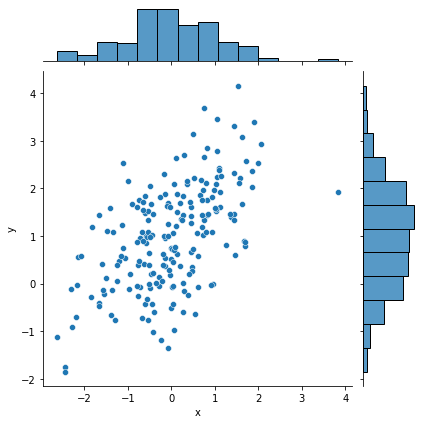

In [5]:
sns.jointplot(x="x", y="y", data=df)

**Hexbin plots.** The bivariate analogue of a histogram is known as a “hexbin” plot, because it shows the counts of observations that fall within hexagonal bins. This plot works best with relatively large datasets. It’s availible through the matplotlib plt.hexbin function and as a style in jointplot()

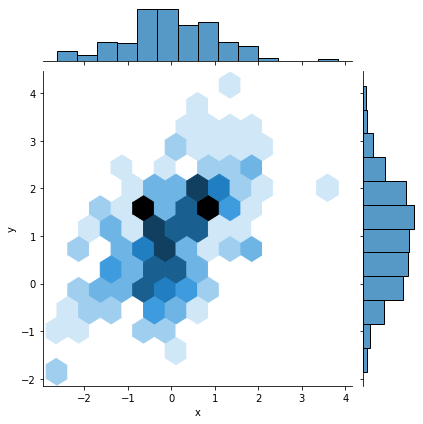

In [6]:
sns.jointplot(x="x", y="y", data=df, kind="hex")

**Kernel density estimation.** It is also posible to use the kernel density estimation procedure described above to visualize a bivariate distribution. In seaborn, this kind of plot is shown with a contour plot and is available as a style in jointplot()

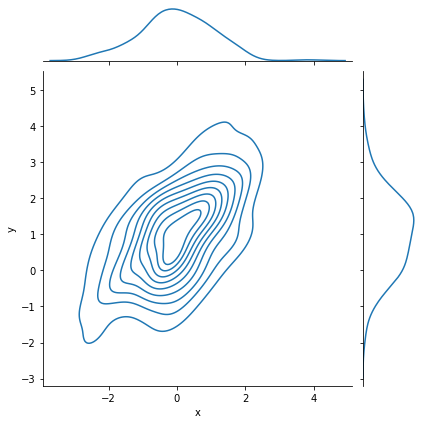

In [7]:
sns.jointplot(x="x", y="y", data=df, kind="kde")

3.2  Visualizing pairwise relationships in a dataset
To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal Axes:

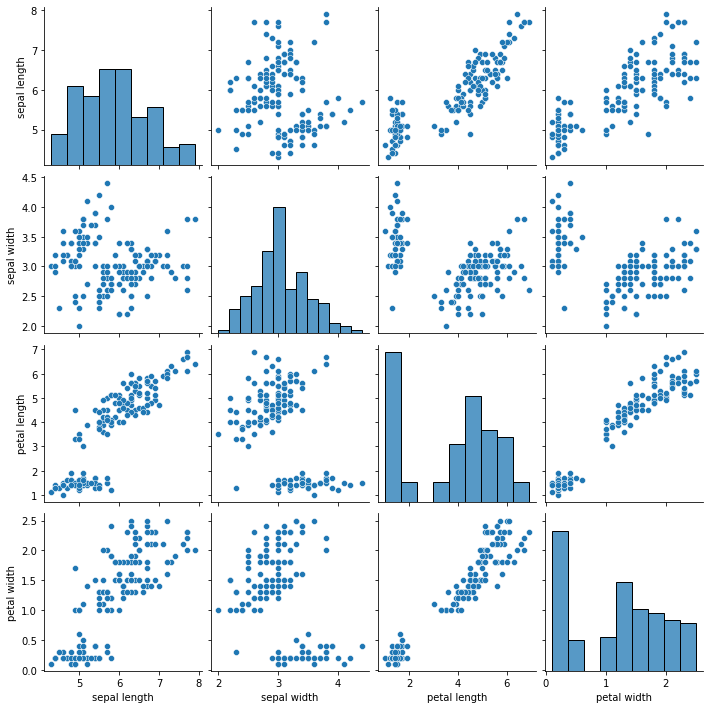

In [10]:
flora = pd.read_csv ('iris.csv')
sns.pairplot(flora)

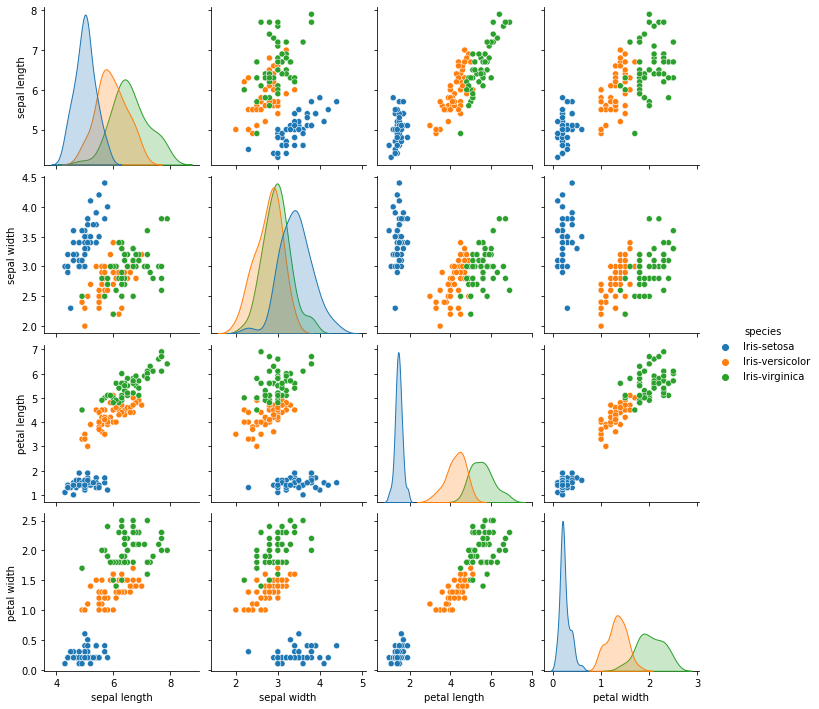

In [11]:
# We can add colors to different species
sns.pairplot(flora, hue="species")

In [15]:
flora

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='petal length', ylabel='petal width'>

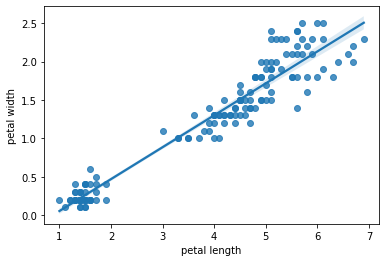

In [17]:
sns.regplot(x="petal length", y="petal width", data=flora)